In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [3]:
(train_images, train_lables), (test_images, test_lables)= datasets.cifar10.load_data()
train_images, test_images= train_images/255.0, test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
optimizer= optimizers.Adam (learning_rate=0.001, beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_lables, epochs=15, batch_size=128, validation_data=(test_images, test_lables))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.2357 - loss: 2.0901 - val_accuracy: 0.3584 - val_loss: 1.7894
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.3700 - loss: 1.7463 - val_accuracy: 0.4126 - val_loss: 1.6503
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.4090 - loss: 1.6476 - val_accuracy: 0.4218 - val_loss: 1.5965
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4375 - loss: 1.5665 - val_accuracy: 0.4383 - val_loss: 1.5596
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4593 - loss: 1.5122 - val_accuracy: 0.4568 - val_loss: 1.5153
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.4695 - loss: 1.4696 - val_accuracy: 0.4693 - val_loss: 1.4861
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.4896 - loss: 1.4246 - val_accuracy: 0.4850 - val_loss: 1.4439
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5066 - loss: 1.3862 - 

In [7]:
test_loss, test_acc= model.evaluate(test_images, test_lables, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.5168 - loss: 1.3737
Test accuracy: 0.5167999863624573


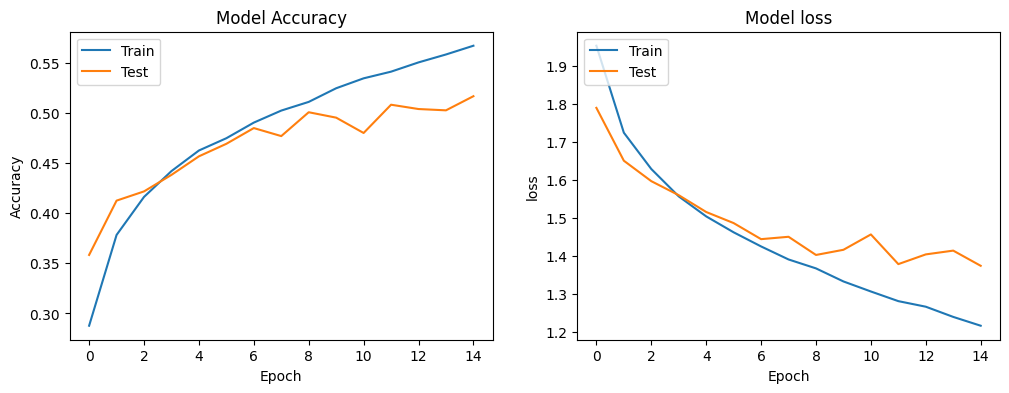

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()